In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
import tensorflow.keras as keras
%matplotlib inline

In [2]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert class vectors to binary class matrices.
Y_train = keras.utils.to_categorical(Y_train_orig, 10)
Y_test = keras.utils.to_categorical(Y_test_orig, 10)    

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Res_cifar10_l2_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [4]:
from cifar10_net import ResNet20
model1 = ResNet20(input_shape = (32, 32, 3), classes = 10)
model1.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Learning rate:  0.001
Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2_1_conv2d_1 (Conv2D)       (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2_1_bn_1 (BatchNormalizatio (None, 32, 32, 16)   64          conv2_1_conv2d_1[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           conv2_1_bn_1[0][0]      

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    data_format=None,
    validation_split = 0.0)

In [6]:
history1 = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              epochs = 100, 
                              validation_data=(X_test, Y_test),
                              callbacks=[scheduler, checkpoint])

Learning rate:  0.001
Epoch 1/100
10000/1563 [===============================================================================================================================================================================================] - 3s 278us/sample - loss: 1.3908 - acc: 0.5258

Epoch 00001: val_acc improved from -inf to 0.52580, saving model to C:\Users\19244\saved_models\ResNet_20_l2_model.h5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5370 - acc: 0.4679 - val_loss: 1.4150 - val_acc: 0.5258
Learning rate:  0.001
Epoch 2/100
10000/1563 [===============================================================================================================================================================================================] - 3s 292us/sample - loss: 1.0592 - acc: 0.5990

Epoch 00002: val_acc improved from 0.52580 to 0.59900, saving model to C:\Users\19244\saved_models\ResNet_20_l2_model.h5
1563/1563 [==============================] - 47s 30ms/step - l

Learning rate:  0.001
Epoch 15/100
10000/1563 [===============================================================================================================================================================================================] - 3s 331us/sample - loss: 0.7576 - acc: 0.8075

Epoch 00015: val_acc improved from 0.80620 to 0.80750, saving model to C:\Users\19244\saved_models\ResNet_20_l2_model.h5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6123 - acc: 0.8475 - val_loss: 0.7619 - val_acc: 0.8075
Learning rate:  0.001
Epoch 16/100
10000/1563 [===============================================================================================================================================================================================] - 3s 339us/sample - loss: 0.6949 - acc: 0.8364

Epoch 00016: val_acc improved from 0.80750 to 0.83640, saving model to C:\Users\19244\saved_models\ResNet_20_l2_model.h5
1563/1563 [==============================] - 53s 34ms/ste


Epoch 00043: val_acc did not improve from 0.85650
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5169 - acc: 0.8891 - val_loss: 0.7111 - val_acc: 0.8435
Learning rate:  0.001
Epoch 44/100
10000/1563 [===============================================================================================================================================================================================] - 4s 361us/sample - loss: 0.9431 - acc: 0.8363

Epoch 00044: val_acc did not improve from 0.85650
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5157 - acc: 0.8880 - val_loss: 0.6843 - val_acc: 0.8363
Learning rate:  0.001
Epoch 45/100
10000/1563 [===============================================================================================================================================================================================] - 3s 319us/sample - loss: 0.8151 - acc: 0.8490

Epoch 00045: val_acc did not improve from 0.85650
1563/1563 [============


Epoch 00072: val_acc did not improve from 0.86980
1563/1563 [==============================] - 52s 33ms/step - loss: 0.4848 - acc: 0.8995 - val_loss: 0.6566 - val_acc: 0.8562
Learning rate:  0.001
Epoch 73/100
10000/1563 [===============================================================================================================================================================================================] - 3s 324us/sample - loss: 0.7457 - acc: 0.8650

Epoch 00073: val_acc did not improve from 0.86980
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4818 - acc: 0.9002 - val_loss: 0.6281 - val_acc: 0.8650
Learning rate:  0.001
Epoch 74/100
10000/1563 [===============================================================================================================================================================================================] - 3s 310us/sample - loss: 0.5215 - acc: 0.8695

Epoch 00074: val_acc did not improve from 0.86980
1563/1563 [============


Epoch 00086: val_acc did not improve from 0.90930
1563/1563 [==============================] - 50s 32ms/step - loss: 0.3298 - acc: 0.9476 - val_loss: 0.4663 - val_acc: 0.9071
Learning rate:  0.0001
Epoch 87/100
10000/1563 [===============================================================================================================================================================================================] - 3s 325us/sample - loss: 0.5308 - acc: 0.9097

Epoch 00087: val_acc improved from 0.90930 to 0.90970, saving model to C:\Users\19244\saved_models\ResNet_20_l2_model.h5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3205 - acc: 0.9507 - val_loss: 0.4642 - val_acc: 0.9097
Learning rate:  0.0001
Epoch 88/100
10000/1563 [===============================================================================================================================================================================================] - 3s 283us/sample - loss: 0.5092 - acc: 0.9102




Epoch 00100: val_acc did not improve from 0.91310
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2547 - acc: 0.9634 - val_loss: 0.4564 - val_acc: 0.9085


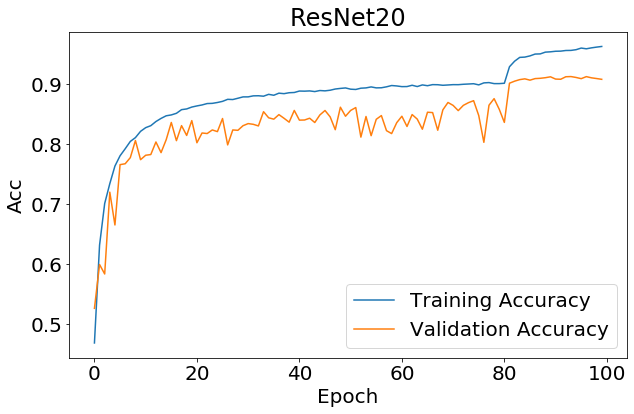

In [8]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(acc1, label='Training Accuracy')
ax1.plot(val_acc1, label='Validation Accuracy')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'Acc', fontsize=20)
ax1.set_title('ResNet20', fontsize=24)

ax1.tick_params(labelsize=20)

ax1.legend(loc=4, fontsize=20)

plt.show()